In [1]:
# To run the examples in this notebook, run this cell
# first to ensure all requisite packages are available.
using Pkg
Pkg.activate(@__DIR__); Pkg.instantiate();

Activating environment at `~/devel/CMB.jl/examples/square_pixel_window_function/Project.toml`


$
    \newcommand{\mat}[1]{\mathbf{#1}}
    \newcommand{\alm}{a_{\ell m}}
    \newcommand{\Ylm}{Y_{\ell m}}
    \newcommand{\llm}{\lambda_\ell^m}
    \newcommand{\ellmax}{\ell_{\mathrm{max}}}
    \newcommand{\wpix}{w_{\mat p}}
    \newcommand{\wl}{w_{\ell}}
    \newcommand{\wlm}{w_{\ell m}}
    \newcommand{\dx}{\frac{\Delta x}{2}}
    \newcommand{\dy}{\frac{\Delta y}{2}}
    \newcommand{\dz}{\frac{\Delta z}{2}}
    \newcommand{\df}{\frac{\Delta\phi}{2}}
    \newcommand{\sinc}{\operatorname{sinc}}
$

# Pixel window functions

*This section borrows heavily from (and is largely a reproduction of) the
[HEALPix documentation](https://healpix.jpl.nasa.gov/html/intronode14.htm).*

The signal $f(\mat p)$ contained in a pixelized map of pixels
$\{\mat p\}$ is an average of the underlying continuous function
$f(\mat r)$ within the area of a given pixel

\begin{align}
    f(\mat p) &= \int \wpix(\mat r) f(\mat r) \,d\mat r
\end{align}

where $\wpix(\mat r)$ is a function defining the pixel, being zero
everywhere outside the pixel and normalized to the pixel area
$\Omega_{\mat p}^{-1}$ inside so that the integral
$\int \wpix(\mat r) \,d\mat r = 1$.
Assuming use of the spherical harmonics on the full sphere, synthesis of
the pixelized signal $f(\mat p)$ is given by the summation

\begin{align}
    f(\mat p) &= \sum_{\ell=0}^{\ellmax} \sum_{m=-\ell}^\ell
        \alm \wlm(\mat p)
\end{align}

where the basis functions $\wlm(\mat p)$ are the corresponding
pixelization of the spherical harmonics,

\begin{align}
    \wlm(\mat p) &= \int \wpix(\mat r) \Ylm(\mat r) \,d\mat r \text{.}
        \label{eqn:pixelwindow:defn}
\end{align}

In general, computing $\wlm(\mat p)$ for every pixel and analyzing
$f(\mat p)$ with them is computationally prohibitive, and therefore we
are motivated to make simplifying assumptions.
The aim is to reduce the problem from describing a complete set of basis
functions to a simple correction factor to be applied to the power spectrum.
For a map with pixels smaller than the characteristic correlation length
of the signal (which is in practice set by the optical beam size of the
experiment), we make the assertion that we can instead define
$\wlm(\mat p)$ as

\begin{align}
    \wlm(\mat p) \equiv \wl(\mat p) \Ylm(\mat p)
\end{align}

where the $m$-averaged window function $\wl(\mat p)$ is defined
as

\begin{align}
    \wl(\mat p) \equiv \left( \frac{4\pi}{2\ell + 1} \sum_{m=-\ell}^\ell
        \left| \wlm(\mat p) \right|^2 \right)^{1/2} \text{.}
\end{align}

Then by further assuming that all pixels are identical, we average over
all pixels to define the effective pixel window function $W_\ell$

\begin{align}
    W_\ell = \left( \frac{1}{N_{\mathrm{pix}}} \sum_{i=1}^{N_{\mathrm{pix}}}
        \wl^2({\mat p}_i) \right)^{1/2} \text{.}
    \label{eqn:pixelwindow:eff}
\end{align}

This defines a relation whereby the power spectrum estimated from a
pixelized map with the spherical harmonics, $\hat{C}_\ell$, is related
to the (hypothetical) unpixelized map's power spectrum, $C_\ell$, by

\begin{align}
    \hat{C}_\ell &= W_\ell^2 C_\ell \text{.}
\end{align}

Therefore, we can estimate the unpixelized power spectrum from a
measured pixelized map by “deconvolving” the pixel window function in
harmonic space:

\begin{align}
    C_\ell &= W_\ell^{-2} \hat{C}_\ell \text{.}
\end{align}

# Pixel window function for square (RA-Dec) pixels

Let us calculate the pixel window function for the BICEP/Keck Array
square pixelization.
The pixels are defined to be squares in latitude and longitude, so the
pixel indicator functions $\wpix(\mat r)$ are trivially defined:

\begin{align}
    \wpix(\mat r) = \begin{cases}
        \Omega_p^{-1} &
            \delta \in \delta_p \pm \frac{\Delta\delta}{2}
            \quad\text{and}\quad
            \lambda \in \lambda_p \pm \frac{\Delta\lambda}{2}
        \\
        0 & \text{otherwise}
    \end{cases}
\end{align}

where $\mat r$ is a latitude-longitude coordinate pair
$(\delta,\lambda)$ and each pixel $\mat p$ is centered at the
coordinates $(\delta_p, \lambda_p)$ with width $\Delta\lambda$ and
height $\Delta\delta$ (providing a surface area $\Omega_p$).

To proceed, we convert from the latitude-longitude definitions in degrees
to colatitude-azimuth $(\theta, \phi)$ in radians and further let
$z = \cos(\theta)$. Then we combine the pixel window function expression
with the definition of the spherical harmonics
$\Ylm(\theta,\phi) = (-1)^m\llm(\cos\theta) e^{im\phi}$
where $\llm$ are the associated Legendre polynomials with the spherical
harmonic normalization baked in.
Because of the simplicity of the pixel definition (and that it lines up
along the directions of integration), the integral is separable in each
direction.

\begin{align*}
    \wlm(\mat p) &= \int_{z_p-\dz}^{z_p+\dz}
        \int_{\phi_p-\df}^{\phi+\df}
        \Omega_p^{-1} (-1)^m \llm(z) e^{im\phi} \,dz\,d\phi
    \\
    {} &= (-1)^m \Omega_p^{-1}
        \left( \int_{\phi_p-\df}^{\phi+\df} e^{im\phi} \,d\phi \right)
        \left( \int_{z_p-\dz}^{z_p+\dz} \llm(z) \,dz \right)
\end{align*}

We'll leave the integral in $z$ to be computed numerically.
The integral in $\phi$, though, can be computed analytically:

\begin{align*}
    \int_{\phi_p-\df}^{\phi+\df} e^{im\phi} \,d\phi &=
        2 e^{im\phi_p} \frac{\sin\left(m\df\right)}{m}
    = \Delta\phi \sinc\left(\frac{m\Delta\phi}{2}\right) e^{im\phi_p}
\end{align*}

where we make use of the unnormalized sinc function, defined to be
$\displaystyle \sinc(x) \equiv \begin{cases}
    \hfil 1\hfil & \text{if } x = 0 \\
    \frac{\sin(x)}{x} & \text{if } x \neq 0
\end{cases}$.

Written in full:

\begin{align}
    \wlm(\mat p) &= (-1)^m \Omega_p^{-1}
        \Delta\phi \sinc\left(\frac{m\Delta\phi}{2}\right) e^{im\phi_p}
        \left( \int_{z_p-\dz}^{z_p+\dz} \llm(z) \,dz \right)
\end{align}

Moving on to compute the azimuthally averaged window $\wl(\mat p)$,
taking the conjugate square of this expression permits further
simplification since the $(-1)^m$ and $e^{im\phi_p}$ terms both cancel
to unity.
There is also a symmetry in $\llm(z)$ which permits us to consider only
non-negative $m$ by including a multiplicity factor of 2 for
$m > 0$. Therefore,

\begin{align}
    \wl(\mat p) &= \left[ \frac{4\pi\,\Omega_p^{-1}}{2\ell + 1}
        \sum_{m=0}^{\ell} \mu_m
            \Delta\phi^2 \sinc^2 \left(\frac{m\Delta\phi}{2}\right)
            I_{\ell m}^2(\mat p)
        \right]^{1/2}
    &\text{where}\quad
    \begin{aligned}
        \mu_m &\equiv \begin{cases}
            \,1 & \text{if }m = 0 \\
            \,2 & \text{otherwise}
        \end{cases}
        \\
        I_{\ell m}(\mat p) &\equiv \int_{z_p-\dz}^{z_p+\dz} \llm(z)\,dz
    \end{aligned}
\end{align}

# Calculating the pixel window function

**The BICEP/Keck pixelization**

First, let us define the BICEP/Keck map pixelization. It is an
equidistant cylindrical projection (ECP) with square pixels with
physical arc lengths of $0.25^\circ$ on a side at the standard parallel
of $-57.5^\circ$. The map spans $\text{RA} \in [-55^\circ, +55^\circ]$
and $\text{Dec} \in [-70^\circ, -45^\circ]$.

An important note about this pixelization is that the definition
is in terms of physical arc lengths, not coordinates lengths.
Mapping latitude/longitude onto the sphere compresses lines of
longitude nearer to one another toward the poles, so the coordinate
step $\Delta\lambda > 0.25^\circ$.
In fact, at $\delta = -57.5^\circ$, we have
\begin{align}
   \Delta\delta &= 0.25^\circ
          & \rightarrow \Delta\theta &\approx 4.36 \cdot 10^{-3}\,\mathrm{rad}\\
   \Delta\lambda &= \frac{0.25^\circ}{\cos(-57.5^\circ)} \approx 0.465^\circ
          & \rightarrow \Delta\phi &\approx 8.12 \cdot 10^{-3}\,\mathrm{rad}
\end{align}

In [2]:
using CMB.Sphere: colataz

# pixel edges line up with center of map, not the pixel centers.
Δδ, Δλ = (0.250,  0.250/cosd(-57.5))
δ₀, λ₀ = (-57.5,  0.000) .+ 0.5 .* (Δδ, Δλ)

θmin, ϕmin = colataz(δ₀ + 0.5Δδ, λ₀ - 0.5Δλ)
θmax, ϕmax = colataz(δ₀ - 0.5Δδ, λ₀ + 0.5Δλ)
nothing

By symmetry, pixels within a row in the BICEP map has the same
pixel window function — there's no explicit dependence on $\phi_p$, only
$\Delta\phi$ which is a constant.
In the other direction, though, the integral over Legendre polynomials
is a function of $z$, so each row of the map has a unique pixel window
function.

As a crude approximation, one can take the effective pixel window function
$W_\ell$ to be the average all rows in the entire field.
A map-specific effective pixel window function could also be generated by
using a weighted average over the per-row weights, given a real map.

**Integrating the Legendre polynomials**

Now let us tackle the problem of calculating the integral of the Legendre
polynomials over the pixel area.
The numerical integration itself will be handled by the
[`HCubature`](https://github.com/stevengj/HCubature.jl) package; we just
need to calculate the legendre polynomials at particular values of $z$
on demand.

The `CMB.Legendre` module provides the `legendre()`-family of functions.
Because the polynomials are computed via recursion relations over $\ell$
and $m$, it is most efficient to compute all degrees and orders
simultaneously and integrate them all.

In [3]:
using CMB.Legendre, HCubature

"""
    legendre_integral(zmin, zmax, lmax::Integer, Λtab::LegendreAbstractNorm)

Calculates the squared integral of the associated Legendre polynomials
from `zmin` to `zmax` for all ``(\ell,m)`` terms from `0` to `lmax`.
"""
function legendre_integral(zmin, zmax, lmax::Integer, Λtab::AbstractLegendreNorm=LegendreSphereNorm())
    # Convergence is either very slow or impossible to achieve given
    # default tolerance. Fall back to just performing a fixed number of
    # evaluations.
    maxevals = 100
    # N.B.: hquadrature() calls the function multiple time during
    #       evaluation, so we can't use a pre-allocated output since
    #       it'd modify the return values during one step of the
    #       integration.
    f(z) = legendre.(Λtab, 0:lmax, 0:lmax, z)
    Λint, Λerr = hquadrature(f, zmin, zmax, maxevals=maxevals)
    Λint .^= 2
    return Λint
end

legendre_integral

**Integrating the complex exponential**

The analytic expression for the integral over $\phi$ is simple to
translate:

In [4]:
"""
    phi_integral(ϕmin, ϕmax, lmax::Integer)

Calculates the squared integral of the complex exponential from
`ϕmin` to `ϕmax` for all ``(\ell,m)`` terms from `0` to `lmax`.
"""
function phi_integral(ϕmin, ϕmax, lmax::Integer)
    # _sinc(x) == sinc(x/π) without the extra division
    _sinc(x) = iszero(x) ? one(sin(zero(x))) : sin(x) / x
    # analytic kernel
    Δϕ = ϕmax - ϕmin
    Φ(l,m) = (Δϕ * _sinc(m * Δϕ/2))^2
    # broadcast to full matrix of values
    ell = 0:lmax
    return Φ.(ell, ell')
end

phi_integral

We then put the few pieces together, adding appropriate normalizations and
summations to return the pixel window function.

In [5]:
"""
    Wl = pixel_window_function(θmin, θmax, ϕmin, ϕmax; lmax::Int=720)

Calculate the pixel window function `Wl` for a square (RA,Dec) pixel
with the given edges. The window function is calculated up to the
given `lmax`.
"""
function pixel_window_function(θmin, θmax, ϕmin, ϕmax; lmax::Int=720)
    T = promote_type( typeof.(float.((θmin, θmax, ϕmin, ϕmax)))... )
    ell = 0:lmax

    # Integrals
    zmin, zmax = cos(T(θmax)), cos(T(θmin))
    Λint = legendre_integral(zmin, zmax, lmax, LegendreSphereCoeff{T}(lmax))
    Λint[:, 2:end] .*= 2 # double m ≥ 1 to account for missing m ≤ -1 terms

    Φint = phi_integral(ϕmin, ϕmax, lmax)

    # Sum over m's
    wlm2 = dropdims(sum(Λint .* Φint, dims=2), dims=2)

    # Normalize and finalize
    Δϕ = T(ϕmax) - T(ϕmin)
    Δz = zmax - zmin
    norm = (4π / (Δϕ * Δz)^2) ./ (2 .* ell .+ 1)
    Wl = sqrt.(norm .* wlm2)
    return ell, Wl
end

pixel_window_function

**The pixel window function**

Calculating the pixel window function at the reference declination:

In [6]:
@time ell, Wl = pixel_window_function(θmin, θmax, ϕmin, ϕmax, lmax=2160)

 29.264560 seconds (7.89 M allocations: 12.489 GiB, 4.28% gc time)


(0:2160, [1.0000000000000002, 0.9999984080119048, 0.9999952240410358, 0.9999904480980386, 0.9999840801988801, 0.9999761203648492, 0.9999665686225578, 0.9999554250039387, 0.9999426895462472, 0.9999283622920603  …  0.13433031397253006, 0.134275350306045, 0.13421977983919492, 0.13416360373571876, 0.13410682316101175, 0.13404943928212038, 0.13399145326773715, 0.13393286628819745, 0.13387367951547977, 0.1338138941232079])

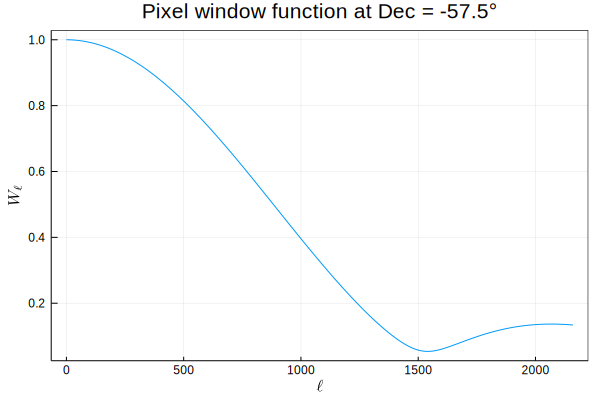

In [7]:
using Plots
default(; framestyle=:box)

plot(ell, Wl, label="")
xlabel!(raw"$\ell$")
ylabel!(raw"$W_\ell$")
title!(raw"Pixel window function at Dec = -57.5°")

Alternatively, we can also compute the family of window functions over all
rows in the map. The standard map is 100 pixels in height, with the edge
between the two middle rows at the standard parallel.

In [8]:
using Base.Threads

"""
    ell, Wl = pwf_rows(θ, Δθ, Δϕ, Nrows::Int, lmax::Int)

Calculates the pixel window functions of `Nrows`-many rows of
pixels height `Δθ` centered at colatitude `θ`.
"""
function pwf_rows(θ, Δθ, Δϕ, Nrows::Int, lmax::Int=720)
    θrows = θ .+ Δθ .* (-Nrows÷2:Nrows÷2)
    @assert(length(θrows) == Nrows + 1)

    Wl_rows = zeros(lmax+1, Nrows)
    @threads for ii in 1:Nrows
        θmin, θmax = θrows[ii], θrows[ii+1]
        ϕmin, ϕmax = 0.0, Δϕ
        _, Wl_rows[:,ii] = pixel_window_function(θmin, θmax, ϕmin, ϕmax, lmax=lmax)
    end
    return (0:lmax, Wl_rows)
end

pwf_rows

In [9]:
lmax = 2160
Nrows = 100
ell_rows, Wl_rows = pwf_rows(θmax, deg2rad(Δδ), deg2rad(Δλ), Nrows, lmax)

(0:2160, [1.0 0.9999999999999999 … 1.0 0.9999999999999999; 0.9999978388041288 0.9999978507932856 … 0.9999988736429982 0.999998881429855; … ; 0.08627402254563647 0.08686975758138768 … 0.11633739211136543 0.11713904352743724; 0.0861845773443293 0.08677612449556475 … 0.11631662977915437 0.11710847985109671])

In [10]:
using Statistics: mean

lc = reshape(range(colorant"red", colorant"orange", length=Nrows), 1, :)
plot(ell_rows, Wl_rows, label="", linecolor=lc)
plot!(ell_rows, mean(Wl_rows, dims=2), label="mean",
    linecolor=colorant"black", linewidth=2)
xlabel!(raw"$\ell$")
ylabel!(raw"$W_\ell$")
title!(raw"Pixel window functions, Dec in [-70, -45]")